# **Sneezy defeating Google Recaptcha**






## Task

Thema: Eine interessante und lehrreiche Datenanalyse auf einem von Ihnen wählbaren Datenset

Einschränkung: Keines der "klassischen" Datensets aus scikit-learn oder Keras.
Die Arbeit soll Ihre Kompetenzen im Bereich Maschinelles Lernen demonstrieren.
Die Arbeit soll die Bereiche "Domainverständnis", "Datenvorverarbeitung", "Analyse" und "Visualisierung" abdecken.
Sie können sich an anderen Arbeiten orientieren, müssen das Gelernte dann aber auf Ihren gewählten Analysegegenstand übertragen.
Verwendete Quellen müssen im Notebook angegeben werden.
Format: Ein vollständiges und in sich abgeschlossenes Jupyter Notebook

Das vollständig ausgeführte Jupyter Notebook ist zusätzlich auch als PDF-Datei einzureichen.
Falls die analysierten Daten zu umfangreich sind um sie mitabzugeben, reicht ein Link auf das Datenset.
Gruppengröße: 4 Personen (in Sonderfällen 3 Personen)

Bearbeitungszeitraum: **16.08 - 08.09.2023**

**23.08: Einreichung einer Projektskizze** (ca. eine DIN A4-Seite): untersuchte Daten, gewählte Fragestellung, geplantes Vorgehen, Aufgabenverteilung in der Gruppe

**30.08: Abgabe eines Zwischenstands** (lauffähiges Jupyter Notebook) und eines Zwischenberichts (ca. eine DIN A4-Seite): erreichter Stand, aufgetretene Herausforderungen, begründete Abweichungen von der Projektskizze

**08.09: Abgabe der finalen Version (vollständiges Jupyter Notebook + Erklärung)**
Erklärung: Unterschriebene Eigenständigkeitserklärung + Aufschlüsselung der Arbeitsaufteilung innerhalb der Gruppe (Hauptverantwortlichkeiten für Bestandteile + individueller Beitrag in Prozent der Gesamtleistung)

Arbeitsumfang: 40 - 50 Arbeitsstunden pro Person

Bewertungskriterien laut Masterhausarbeitsvorlage:

Gliederung der Arbeit / Aufbau und Darstellung der Problemstellung / Systematik / Struktur ("roter Faden")
Wissenschaftlichkeit / Inhaltliche Vollständigkeit und Richtigkeit / Themenrelevanz / Quellenarbeit / Eigenleistung
Klarheit der Darstellung & Stringenz der Argumentationskette / formale Korrektheit / Rechtschreibung / Schreibstil
Zielpublikum: Studierende Ihres Studiengangs

Fokus: Demonstration Ihrer Kompetenzen + Wissensvermittlung (das konkrete Analyseergebnis ist nachrangig)

## Projektskizze

### Google reCAPTCHA V2


#### Hintergrund und Kontext

[Google reCAPTCHA](https://developers.google.com/recaptcha/docs/display) ist ein Sicherheitswerkzeug, das entwickelt wurde, um zwischen menschlichen Benutzern und Bots zu unterscheiden und so Missbrauch und Cyberangriffe zu verhindern. Die Version, reCAPTCHA V2, stellt Benutzern Herausforderungen wie die Identifizierung von Objekten in Bildern. Das Umgehen dieser Sicherheitsmaßnahme mittels maschinellen Lernens und tiefen neuronalen Netzen ist sowohl technisch als auch wissenschaftlich interessant, da es die Leistungsfähigkeit dieser Modelle testet und gleichzeitig zur Verbesserung der Sicherheit von CAPTCHA-Systemen beitragen kann.

#### Fragestellungen und Ziele

Zu welcher Genauigkeit können derzeit Modelle mittels Verfahren des maschinellen Lernens optimiert werden, um in der Anwendung Google’s Recaptha V2 Bilder korrekt zu klassifizieren?

- Welche Methoden zur Qualitätsverbesserung von Bilddatensätzen (z.B. Resampling, Data Augmentation) werden aktuell in der Forschung bevorzugt, und wie wirken sich diese auf das Training von CNNs aus?

- Was sind die neuesten Entwicklungen (State-of-the-Art) in der Bildverarbeitung mit maschinellem Lernen, insbesondere bei der Verwendung von tiefen neuronalen Netzen wie Inceptionv3?  

- Welche in der Forschung bestehenden Metriken zur Klassifikation eignen sich zur Lösung des oben beschriebenen Anwendungsfalls?

#### Geplantes Vorgehen und Aufgabenverteilung

- Explorative Datenanalyse (EDA): Untersuchung der Daten durch Visualisierungen und deskriptive Statistiken, um erste Einblicke zu gewinnen. (Hauptverantwortlich: Rares, Niklas)

- Datenvorbereitung: Erstellen eines geeigneten Datensatzes durch Resizing, Resampling und extrahieren von Labels aus der Ordnerstruktur (Paarprogrammierung)

- Modellierung: Auswahl und Anwendung geeigneter statistischer Modelle oder Algorithmen zur Beantwortung der Fragestellung. (Hauptverantwortlich: Leon)

- Ergebnisse und Interpretation: Analyse der Ergebnisse der Modelle, Interpretation der Befunde und Vergleich mit bestehenden Theorien. (Paarprogrammierung)

- Berichterstattung: Erstellung eines detaillierten Berichts, der die Ergebnisse zusammenfasst und Empfehlungen basierend auf den Befunden gibt. (Paarprogrammierung)

Das Projekt wird im Google Colab1 entwickelt.

#### Literatur und Quellen

Dataset: https://www.kaggle.com/datasets/cry2003/google-recaptcha-v2-images

Notebook – InceptionV3: https://www.kaggle.com/code/ahmedhossam666/google-recapthca

ResNet Paper: https://arxiv.org/abs/1512.03385

Google RecapthaV2: https://developers.google.com/recaptcha/docs/display

## 0. Utilities

In [1]:
""" This module defines the logging component."""

import logging


def create_logger(log_level: str, logger_name: str = "custom_logger"):
    """Create a logging based on logger.

    Args:
        log_level (str): Kind of logging
        logger_name (str, optional): Name of logger

    Returns:
        logger: returns logger
    """
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)  # Set the base logging level to the lowest (DEBUG)

    # If logger already has handlers, don't add a new one
    if logger.hasHandlers():
        logger.handlers.clear()

    # Create a console handler and set the level based on the input
    console_handler = logging.StreamHandler()
    if log_level == "DEBUG":
        console_handler.setLevel(logging.DEBUG)
    elif log_level == "INFO":
        console_handler.setLevel(logging.INFO)
    elif log_level == "WARNING":
        console_handler.setLevel(logging.WARNING)
    elif log_level == "ERROR":
        console_handler.setLevel(logging.ERROR)
    else:
        raise ValueError("Invalid log level provided")

    # Create a formatter and set it for the console handler
    formatter = logging.Formatter(
        "%(asctime)s - %(levelname)s - %(message)s",
        datefmt="%Y-%m-%d %H:%M:%S",
    )
    console_handler.setFormatter(formatter)

    # Add the console handler to the logger
    logger.addHandler(console_handler)

    return logger

In [2]:
logger = create_logger(
    log_level="INFO",
    logger_name=__name__,
)

## 1. Laden der Daten

Google Drive in Google Colab-Notebook einbinden


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Git für Python installieren und importieren


In [3]:
%%capture
!pip install gitpython

In [4]:
import os
import git

Erstelle einen Ordner auf deinem lokalen Laufwerk und navigiere hinein


In [ ]:
# file_path = '/content/drive/MyDrive/MADS2400'
# if os.path.isdir(file_path):
#   %cd /content/drive/MyDrive/MADS2400
# else:
#   %mkdir /content/drive/MyDrive/MADS2400
#   %cd /content/drive/MyDrive/MADS2400

Liste alle Dateien in dem Ordner auf


In [5]:
%ls -a


./                                     README.md
../                                    Sneezy.ipynb
.env                                   Sneezy_old.ipynb
.git/                                  example.env
.gitignore                             load_data.py
Google-Recaptcha-V2-Images/            logs/
Install-TensorFlow-on-Mac-M1-GPU-main/ models/
MADS2400/


Durch die Nutzung eines Tokens wird der Datensatz lokal auf dem Google Drive kopiert.

In [6]:
# TODO: refactor this cell so that there is no error occuring
from dotenv import load_dotenv
load_dotenv()
if not os.path.isdir('/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images') or not os.path.isdir('Google-Recaptcha-V2-Images'):
  git_fine_grained_token = os.environ["git_fine_grained_token"]
  username = 'RaresMihai11'
  repository = 'Google-Recaptcha-V2-Images'
  !git clone https://{git_fine_grained_token}@github.com/{username}/{repository}
else:
  logger.info("already cloned image repository")

fatal: destination path 'Google-Recaptcha-V2-Images' already exists and is not an empty directory.


Liste alle Dateien auf und navigiere in den Ordner Google-Recaptcha-V2-Images

In [7]:
%ls -a
%cd Google-Recaptcha-V2-Images

./                                     README.md
../                                    Sneezy.ipynb
.env                                   Sneezy_old.ipynb
.git/                                  example.env
.gitignore                             load_data.py
Google-Recaptcha-V2-Images/            logs/
Install-TensorFlow-on-Mac-M1-GPU-main/ models/
MADS2400/
/Users/leonhenne/Repositories/nak-git/NAK-ML/Google-Recaptcha-V2-Images


List all the files and navigate into Bicycle folder

In [8]:
%ls

Bicycle/    Car/        Hydrant/    Other/      Stair/
Bridge/     Chimney/    Motorcycle/ Palm/       TLight/
Bus/        Crosswalk/  Mountain/   README.md


## 2. Explorative Datenanalyse


### Verzeichnisstruktur und Dateianzahl
Nach dem erfolgreichen Transfer der Daten auf das lokale Laufwerk ist der erste Schritt die Untersuchung der Verzeichnisstruktur und der Dateianzahl. Dies ermöglicht einen Überblick über die Organisation und die Verteilung der Daten innerhalb der verschiedenen Ordner.


In [9]:
import os
from PIL import Image

# Define the main directory and subfolders
main_dir = '../Google-Recaptcha-V2-Images/'
folders = ["Bicycle", "Bus", "Chimney", "Hydrant", "Mountain", "Palm", "Stair",
           "Bridge", "Car", "Crosswalk", "Motorcycle", "Other", "TLight"]

# Dictionary to store image counts and actual image data per folder
folder_image_data = {}

# Loop through each folder
for folder in folders:

    folder_path = os.path.join(main_dir, folder)

    if os.path.isdir(folder_path):
        # Initialize a list to store image objects and their formats
        image_files = []

        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.lower().endswith(('png', 'jpg', 'jpeg')):
                # Get the full path of the image
                file_path = os.path.join(folder_path, file_name)

                # Load the image using PIL
                with Image.open(file_path) as img:
                    # Get the format of the image
                    img_format = img.format
                    # Append the image object and its format to the list
                    image_files.append({
                        'image': img.copy(),  # Copy to avoid closing issues
                        'format': img_format
                    })

        # Store the image count and list of image objects and formats in the dictionary
        folder_image_data[folder] = {
            "count": len(image_files),
            "images": image_files
        }

        print(f'{folder}: {len(image_files)} Bilder')



Bicycle: 1656 Bilder
Bus: 7166 Bilder
Chimney: 265 Bilder
Hydrant: 6009 Bilder
Mountain: 19 Bilder
Palm: 1648 Bilder
Stair: 433 Bilder
Bridge: 1278 Bilder
Car: 6123 Bilder
Crosswalk: 2056 Bilder
Motorcycle: 196 Bilder
Other: 2614 Bilder
TLight: 2802 Bilder


### Klassenverteilung
Die Anzahl der Bilder in jeder Klasse wurde überprüft und im Balkendiagramm dargestellt. Es ist zu erkennen, dass der Datensatz nicht ausgeglichen ist. Das kann zu einem Bias im Modell führen und die Modellleistung beeinträchtigen.

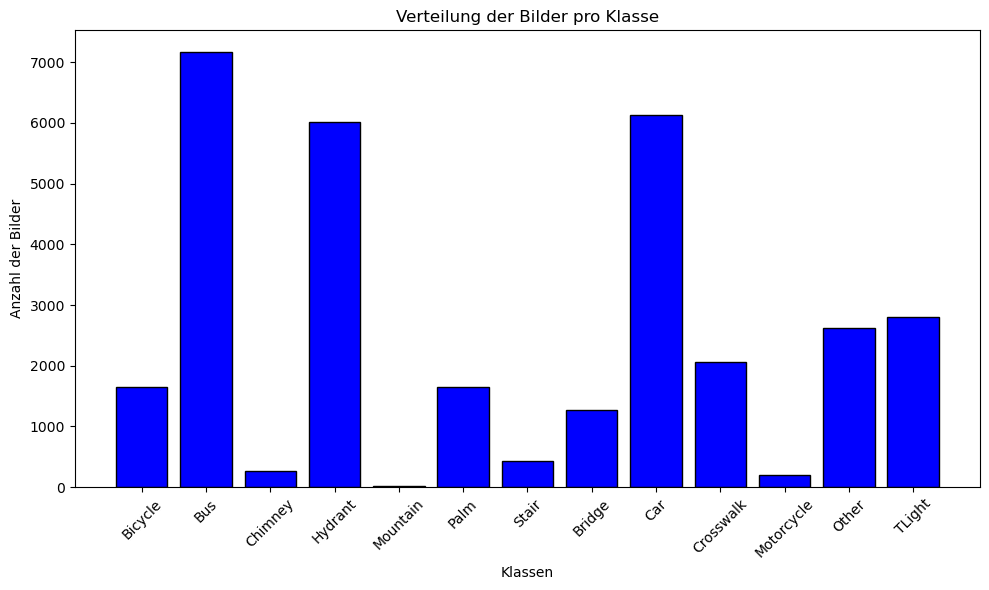

In [10]:
import os
import matplotlib.pyplot as plt

# NOTE: Could be replaced with following comment to reduce ressource allocation:
folder_image_counts = {folder: len(data['images']) for folder, data in folder_image_data.items()}
# image_count = [folder['count'] for folder in folder_image_data.values()]

# Extract keys and values for plotting
folders = folder_image_counts.keys()
# NOTE: same as folder_image_data.keys() which is already created in the cell above
values = folder_image_counts.values()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(folders, values, color='blue', edgecolor='black')
plt.xlabel('Klassen')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Bilder pro Klasse')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dateiendungen prüfen und Konvertierung in JPG
Die Verteilung der Bildformate (z.B. PNG, JPG) wurde untersucht, um sicherzustellen, dass alle Formate berücksichtigt werden. Eine dritte Kategorie für alle anderen Dateiendungen wurde erstellt.

Die Bildformate JPG und PNG weisen zum Beispiel unterschiedliche Eigenschaften auf, insbesondere in Bezug auf die Kanäle (Channels), die sie verwenden. Daher wird auf ein Format konvertiert.

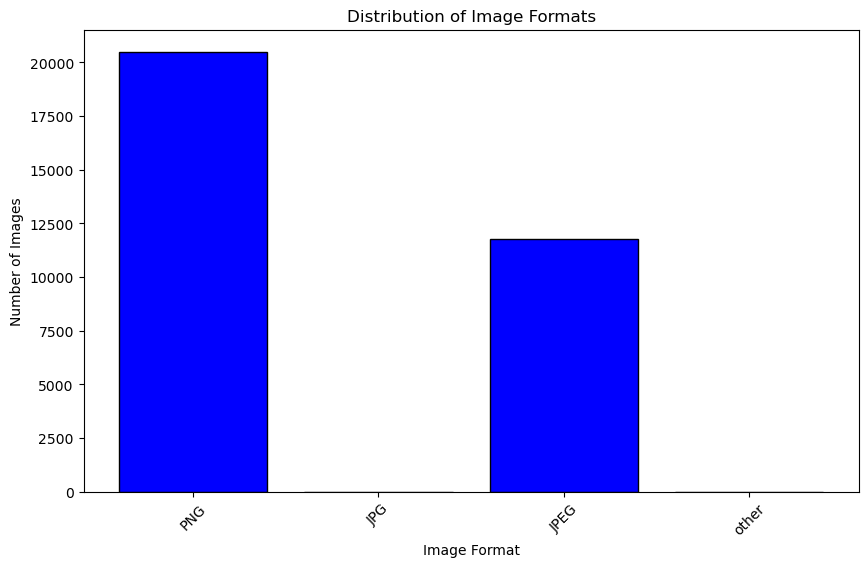

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

def check_file_types():
  file_format_counts = {'PNG': 0, 'JPG': 0, 'JPEG': 0, 'other': 0}

  # Iterate through the folder_image_data dictionary
  for folder, data in folder_image_data.items():
      for img in data['images']:
          # Extract the image format from the image object
          img_format = img['format'] if img['format'] else 'other'

          # Update the count based on the image format
          if img_format in file_format_counts:
              file_format_counts[img_format] += 1
          else:
              file_format_counts['other'] += 1

  # Create a bar plot
  plt.figure(figsize=(10, 6))
  plt.bar(file_format_counts.keys(), file_format_counts.values(), color='blue', edgecolor='black')
  plt.xlabel('Image Format')
  plt.ylabel('Number of Images')
  plt.title('Distribution of Image Formats')
  plt.xticks(rotation=45)
  plt.show()

check_file_types()

2024-08-27 16:40:13 - INFO - Converted images: 20503
INFO:__main__:Converted images: 20503


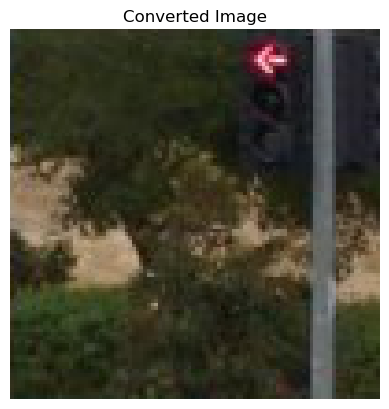

In [12]:
from PIL import Image
import matplotlib.pyplot as plt


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
count = 0
for folder, data in folder_image_data.items():
    converted_images = []

    for img in data['images']:

        if img['format'] == 'PNG':
            count += 1
            img_rgb = img['image'].convert('RGB')
            converted_images.append({'image': img_rgb, 'format': 'JPEG'})

        else:
            converted_images.append(img)

    folder_image_data[folder]['images'] = converted_images

logger.info(f"Converted images: {count}")
if converted_images:
   plt.imshow(converted_images[0]['image'])
   plt.title('Converted Image')
   plt.axis('off')
   plt.show()

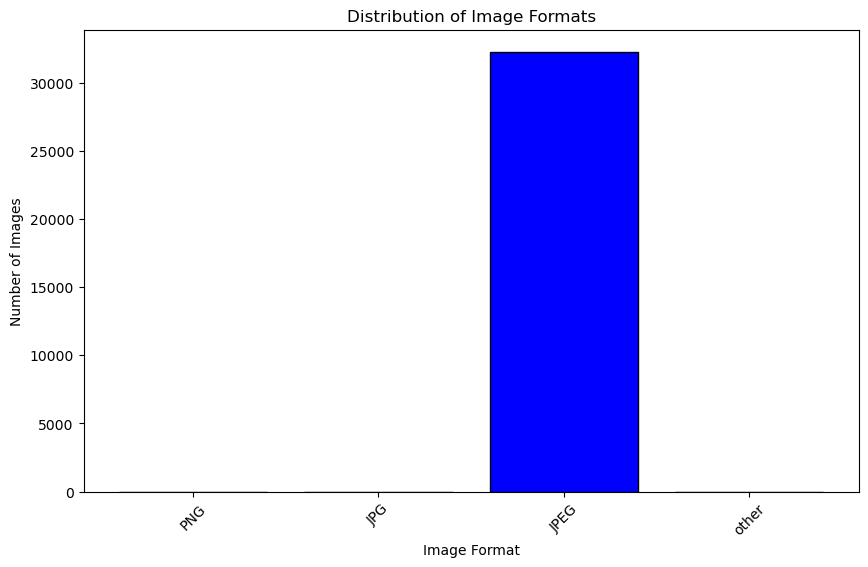

In [13]:
check_file_types()

### Bildgrößen und Auflösungen
Die Verteilung der Bildbreiten und -höhen wurde visualisiert, um ein besseres Verständnis der Größenverteilung innerhalb des Datensatzes zu erlangen. Diese Information ist entscheidend für die Entscheidung über die Bildskalierung und -normalisierung in späteren Schritten der Datenvorverarbeitung.

In [14]:
from PIL import Image
import logging


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

image_sizes = set()

for folder, data in folder_image_data.items():
    for img_data in data['images']:
        img = img_data['image']
        size = img.size
        image_sizes.add(size)


unique_sizes = list(image_sizes)

print("Unique Image Sizes:", unique_sizes)
logger.info(f"Unique Image Sizes: {unique_sizes}")

2024-08-27 16:40:13 - INFO - Unique Image Sizes: [(100, 100), (120, 120)]
INFO:__main__:Unique Image Sizes: [(100, 100), (120, 120)]


Unique Image Sizes: [(100, 100), (120, 120)]


### Plotte ein Bild aus jedem Ordner
Ein visueller Eindruck des Datensatzes wurde durch das Anzeigen von Beispielbildern aus jedem Ordner gewonnen.

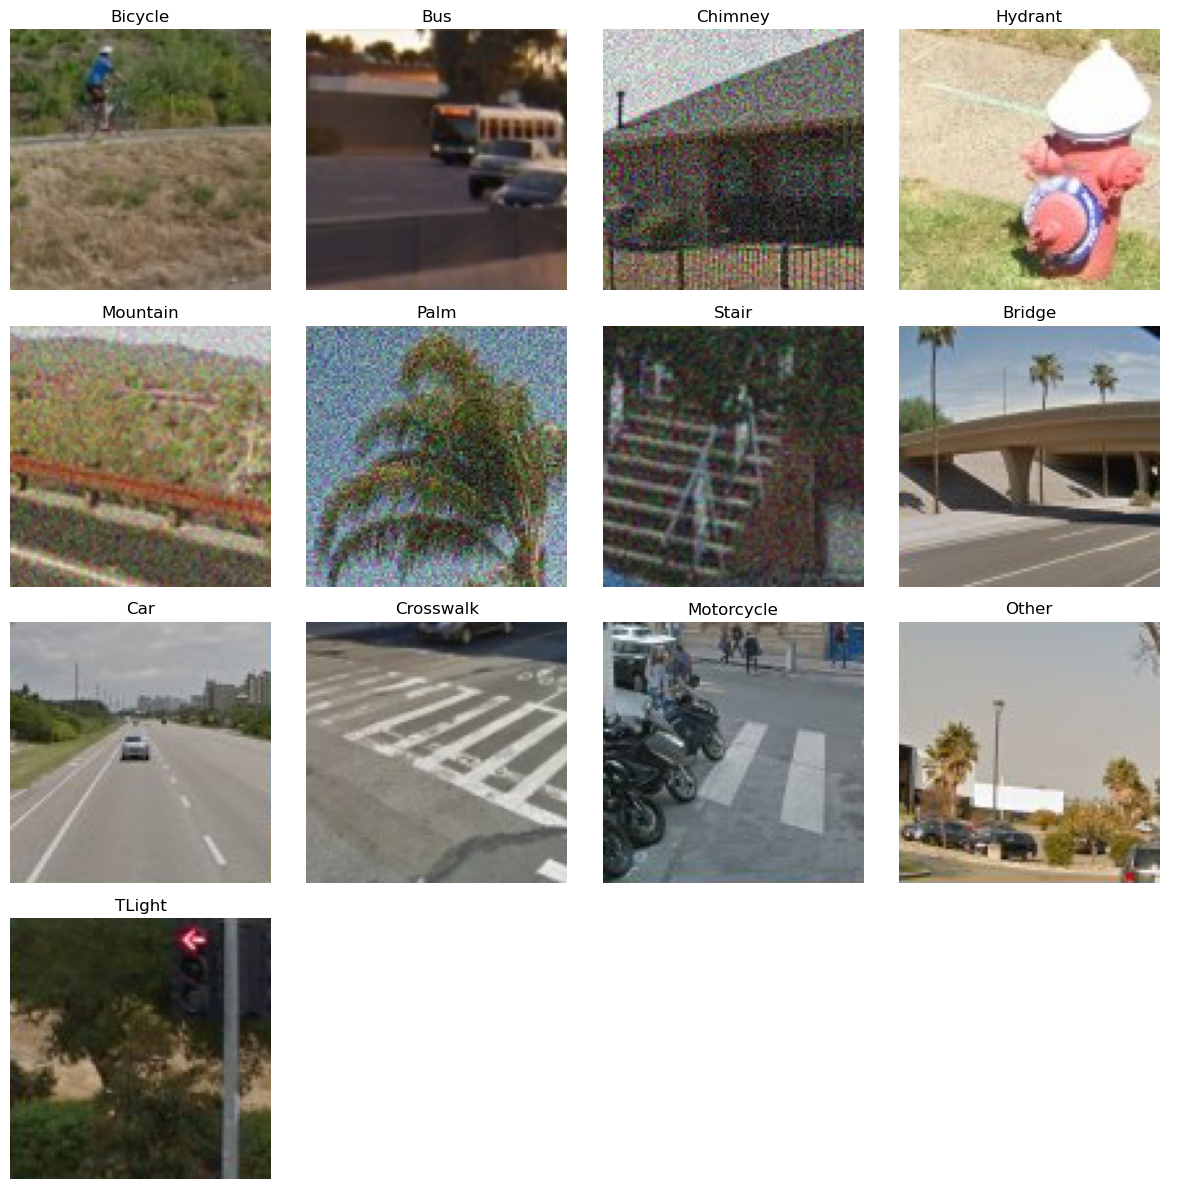

In [15]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(4, 4, figsize=(12, 12))

count = 0


axes = axes.flatten()
for folder, data in folder_image_data.items():
    if count >= 16:
        break
    images = data['images']

    if images:
        img_dict = images[0]
        img = img_dict['image']
        axes[count].imshow(img)
        axes[count].set_title(folder)
        axes[count].axis('off')
        count += 1

for i in range(count, 16):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Zusammenfassung und Schlussfolgerungen der EDA

**Erkenntnisse**

Verteilung der Bildanzahlen: Die meisten Bilder sind in der Kategorie „Car“ vorhanden, was möglicherweise darauf hinweist, dass diese Kategorie am häufigsten vorkommt oder für die reCAPTCHA-Herausforderungen am wichtigsten ist.

Kategorien mit wenig Bildern: Kategorien wie „Mountain“ haben nur sehr wenige Bilder, was zu einer Ungleichheit in der Datenmenge führen kann.

Mögliche Anomalien: Kategorien wie „Mountain“ könnten als mögliche Anomalien betrachtet werden, die weitere Aufmerksamkeit erfordern.

**Empfehlungen**

Datenbalance: Eine Datenbalancierung könnte notwendig sein, um sicherzustellen, dass das Modell gleichmäßig über alle Kategorien trainiert wird.

Weitere Datensammlung: Für Kategorien mit wenigen Bildern könnten zusätzliche Daten gesammelt werden, um die Modellleistung zu verbessern.

## 3. Erstellen eines maschinellen Datensatzes

Das Ziel dieses Abschnitts ist die Erzeugung eines Datensatzes, für die maschinelle Verarbeitung geeignet ist

1. Datenaugmentierung
2. Resizing (Veränderung der Bildgröße)
3. Resampling (Veränderung der Auflösung)
4. Encoding

5. Create Label

### 3.1 Konfiguration der Experimentparameter

In [16]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
import time

log_dir = f'../logs/captcha-{time.strftime("%d.%m.%Y %H:%M:%S", time.localtime())}/'
model_dir = f'../models/{time.strftime("%d.%m.%Y %H:%M:%S", time.localtime())}/' + 'model-{epoch:02d}-{val_loss:.2f}.keras'
logger.info(f"save logs to: '{log_dir}'")
logger.info(f"save models to: '{model_dir}'")

# Define hyperparameters
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.RealInterval(0.001, 0.1))
HP_LOSS = hp.HParam('loss', hp.Discrete(['categorical_crossentropy']))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_EPOCHS = hp.HParam('epochs', hp.IntInterval(1, 10))

# Set the hyperparameters for this run
hparams = {
    HP_LEARNING_RATE: 0.001,
    HP_LOSS: 'categorical_crossentropy',
    HP_OPTIMIZER: 'adam',
    HP_EPOCHS: 5,
}

# Log hyperparameters before training starts
with tf.summary.create_file_writer(log_dir).as_default():
    hp.hparams(hparams)

2024-08-27 16:40:32 - INFO - save logs to: '../logs/captcha-27.08.2024 16:40:32/'
INFO:__main__:save logs to: '../logs/captcha-27.08.2024 16:40:32/'
2024-08-27 16:40:32 - INFO - save models to: '../models/27.08.2024 16:40:32/model-{epoch:02d}-{val_loss:.2f}.keras'
INFO:__main__:save models to: '../models/27.08.2024 16:40:32/model-{epoch:02d}-{val_loss:.2f}.keras'
2024-08-27 16:40:32.847504: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-08-27 16:40:32.847524: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-08-27 16:40:32.847530: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-08-27 16:40:32.847544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-27 16:40:32.847557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device

### 3.2 Daten augumentieren


#### 3.2.1 Augmentierung der Daten durch Zoon, Kontrast, Helligkeit und vertikale Spiegelung

Bicycle now has 2000 images.
Bus now has 7166 images.
Chimney now has 2000 images.
Hydrant now has 6009 images.
Mountain now has 2000 images.
Palm now has 2000 images.
Stair now has 2000 images.
Bridge now has 2000 images.
Car now has 6123 images.
Crosswalk now has 2056 images.
Motorcycle now has 2000 images.
Other now has 2614 images.
TLight now has 2802 images.


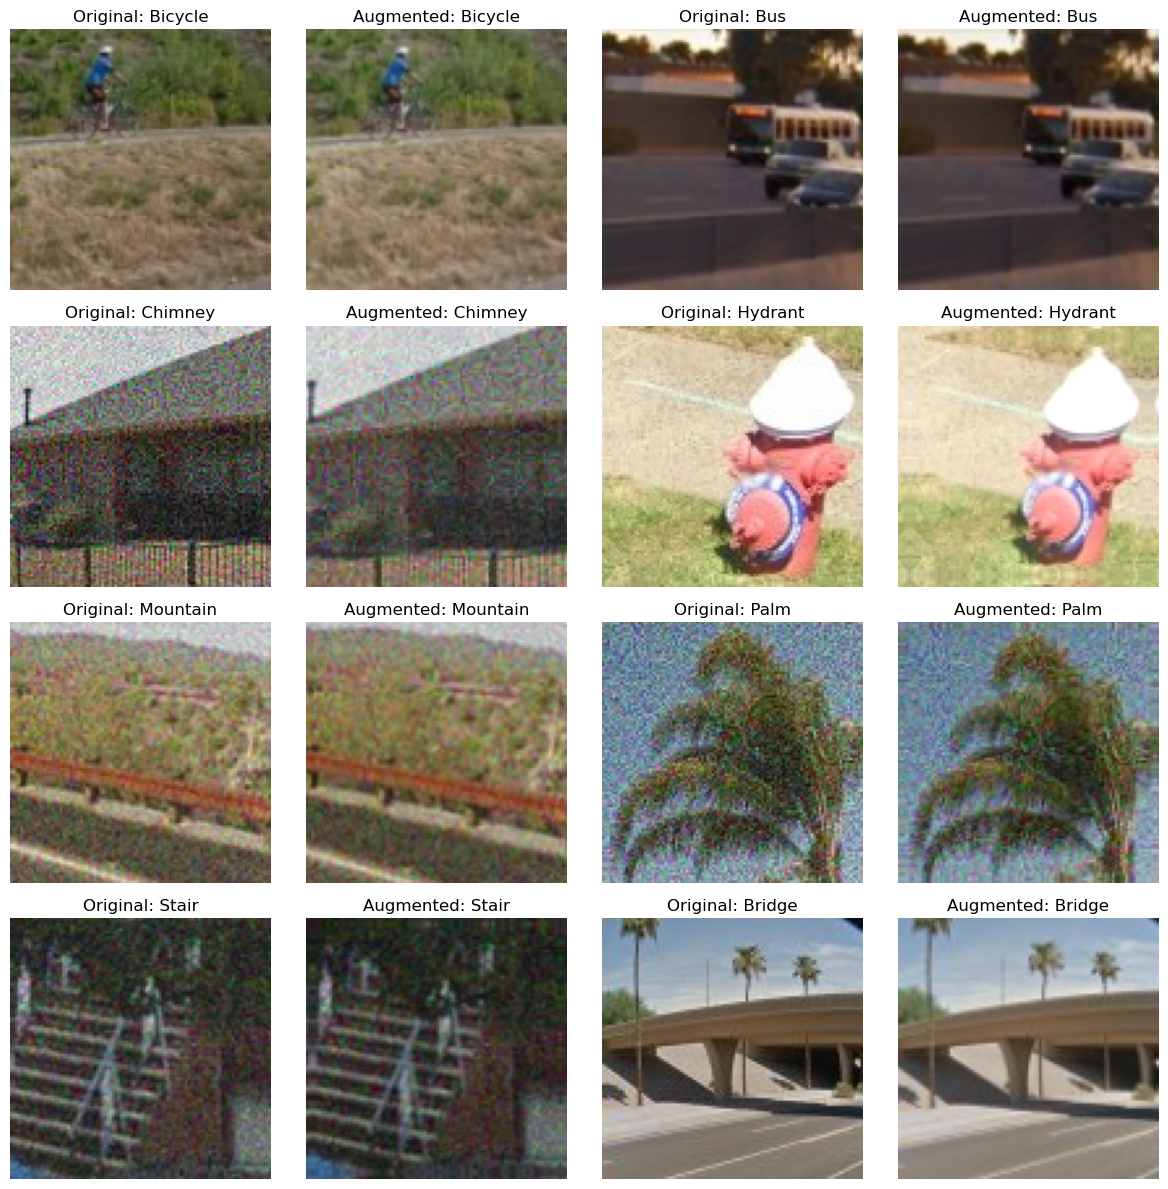

In [18]:
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.05),
    tf.keras.layers.RandomBrightness(0.05),
    #spiegeln FLip
])
# TODO Target count als parameter, in def
# Function to augment images until the count reaches 2000
def augment_images(folder_data, target_count):

    current_count = folder_data['count']
    images = folder_data['images']

    while current_count < target_count:
        for img_dict in images:
            img = img_dict['image']
            img_array = np.array(img.convert('RGB'))

            img_augmented = data_augmentation(tf.expand_dims(img_array, 0))
            img_augmented = tf.squeeze(img_augmented).numpy().astype("uint8")

            img_augmented_pil = Image.fromarray(img_augmented)

            images.append({'image': img_augmented_pil})
            current_count += 1

            if current_count >= target_count:
                break

    folder_data['count'] = current_count
    folder_data['images'] = images

for folder, data in folder_image_data.items():
    if data['count'] < 2000:
        augment_images(data, 2000)

# Verify the augmentation process
# Assert length in for loop, the folders wich have 2k images
for folder, data in folder_image_data.items():
    print(f"{folder} now has {data['count']} images.")

# Display original and augmented images for one category
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
count = 0
axes = axes.flatten()

for folder, data in folder_image_data.items():
    if count >= 16:
        break
    images = data['images']

    if images:
        img_dict = images[0]
        img = img_dict['image']
        img_array = np.array(img.convert('RGB'))

        # Display original image
        axes[count].imshow(img_array)
        axes[count].set_title(f"Original: {folder}")
        axes[count].axis('off')
        count += 1

        # Apply augmentation
        img_augmented = data_augmentation(tf.expand_dims(img_array, 0))
        img_augmented = tf.squeeze(img_augmented).numpy().astype("uint8")

        # Display augmented image
        axes[count].imshow(img_augmented)
        axes[count].set_title(f"Augmented: {folder}")
        axes[count].axis('off')
        count += 1

# Fill remaining subplots
for i in range(count, 16):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

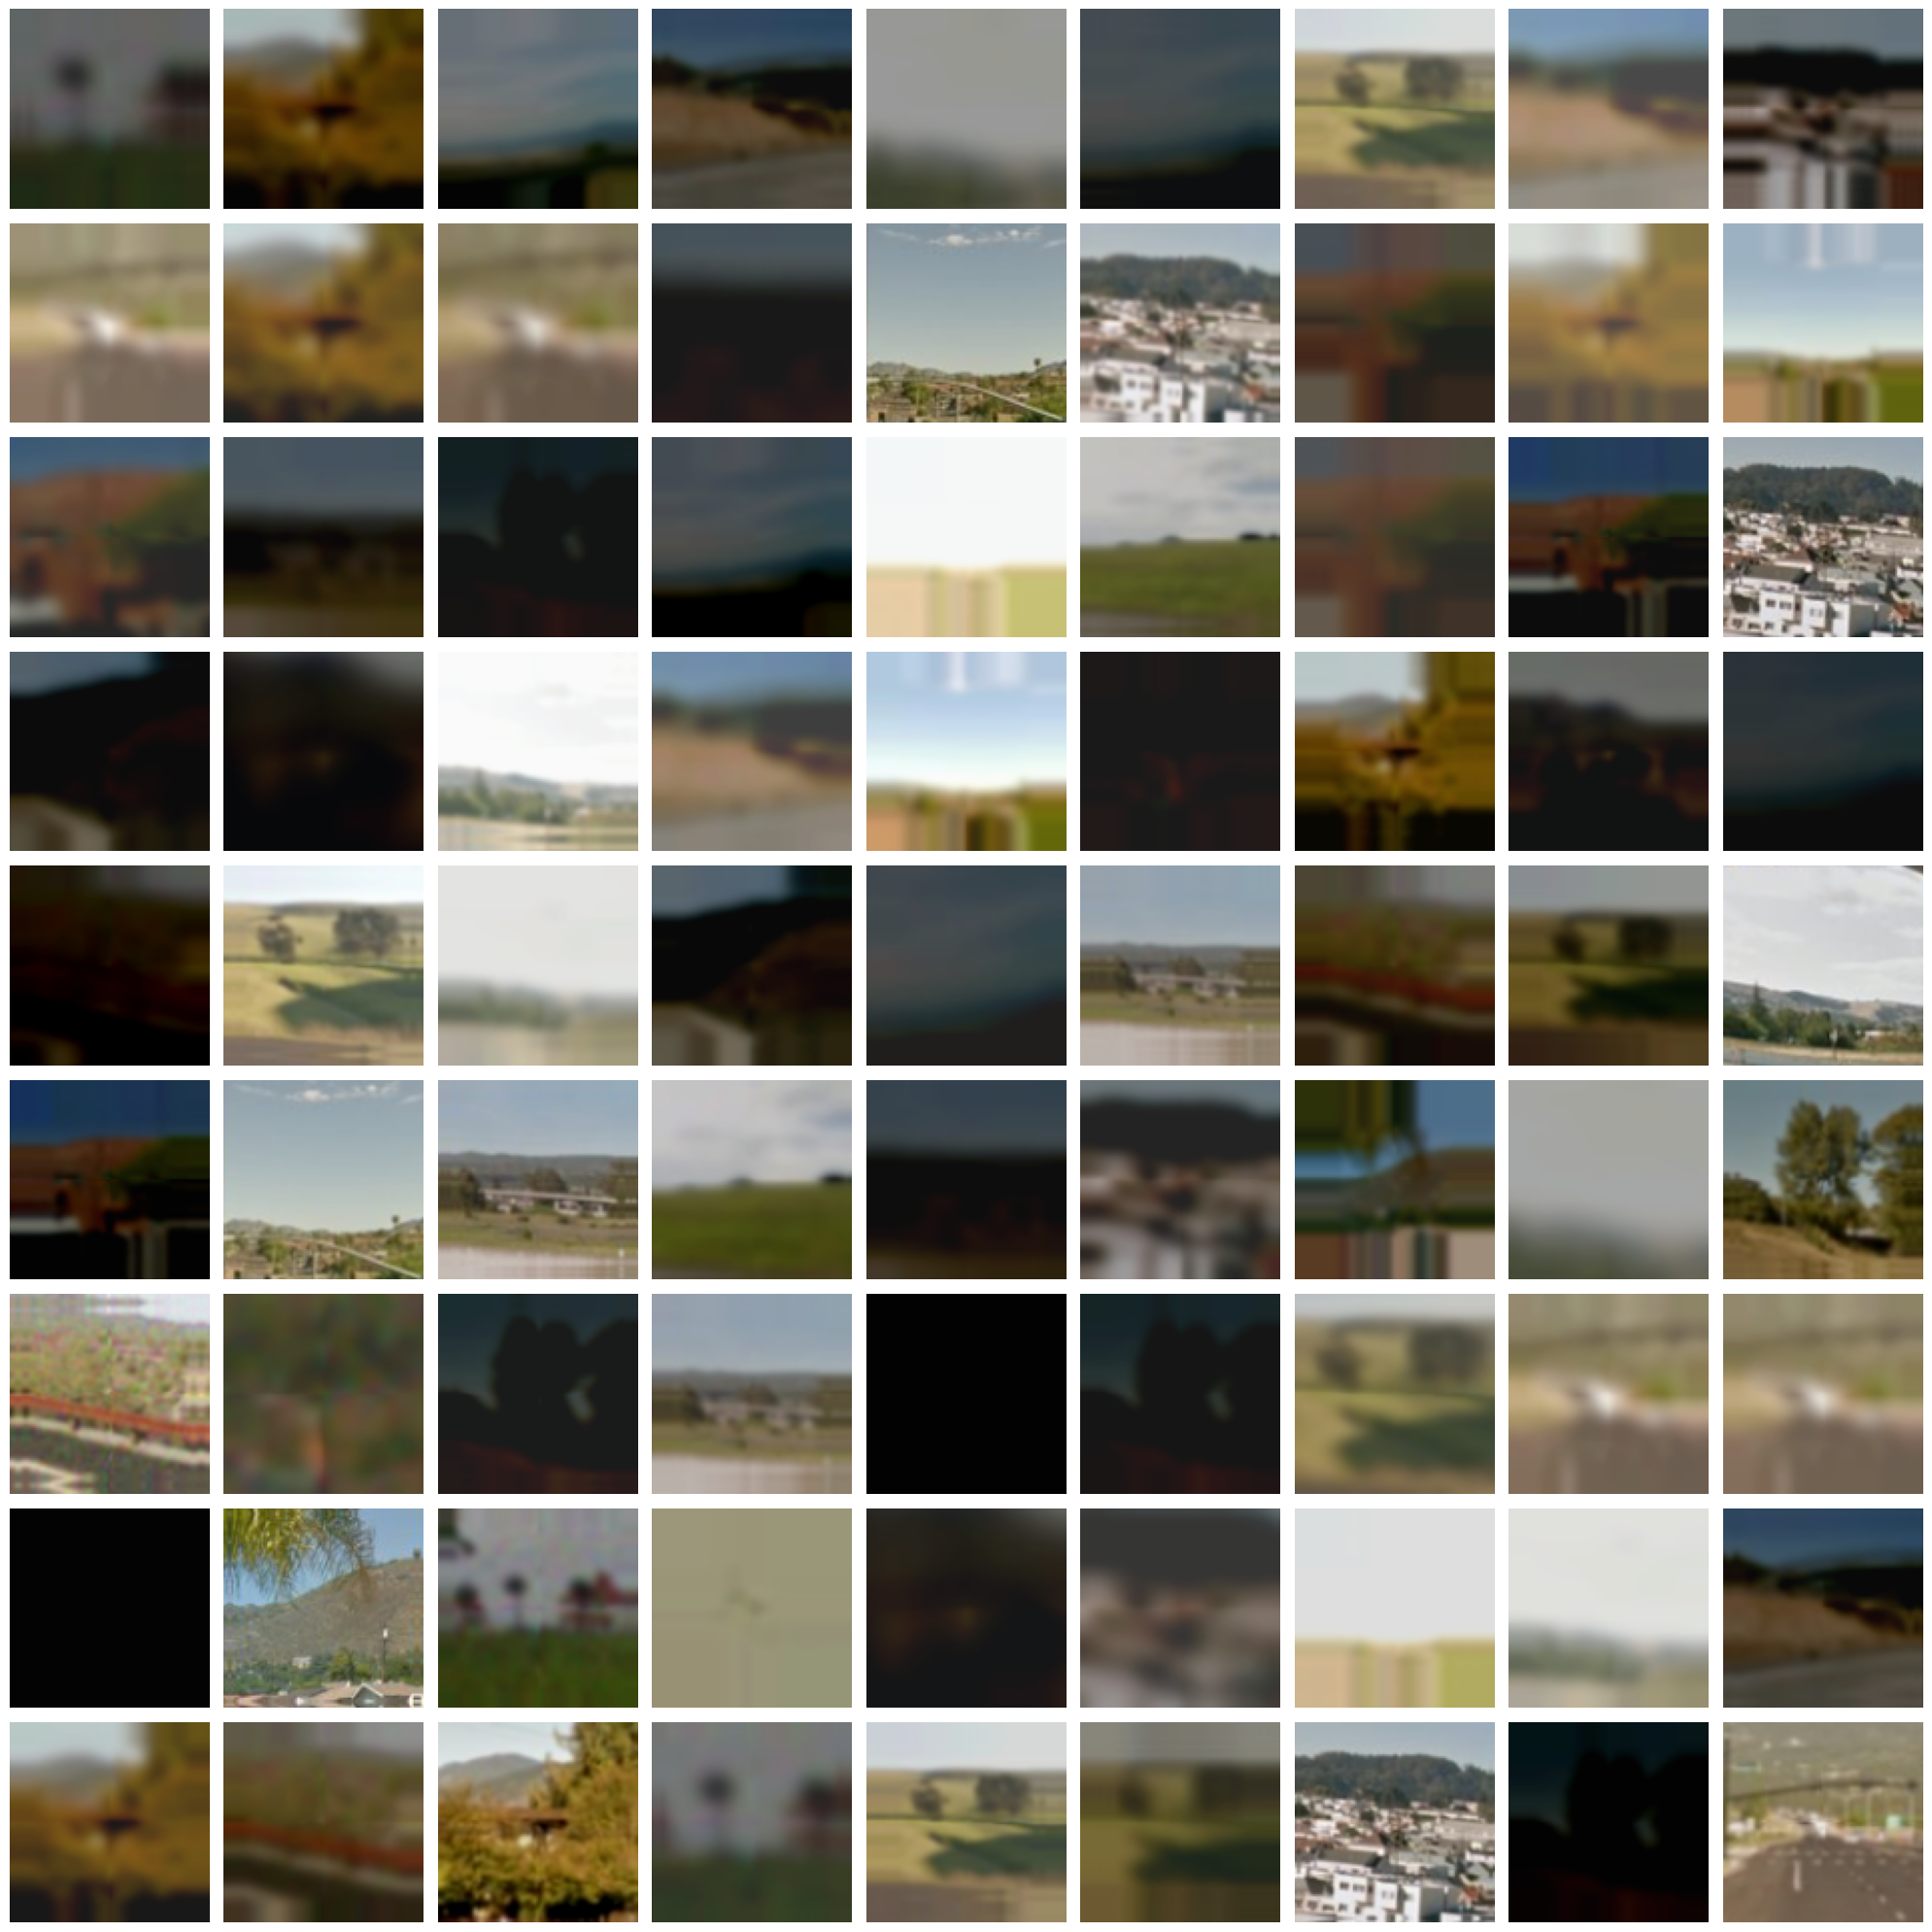

In [19]:
import random
mountain_images = folder_image_data['Mountain']['images']
random.shuffle(mountain_images)
selected_images = mountain_images[:81]  # Select the first 1000 images

# Display the images in a grid
fig, axes = plt.subplots(9, 9, figsize=(20, 20))  # Adjust the grid size as needed
axes = axes.flatten()

for i, img_dict in enumerate(selected_images):
    img = img_dict['image']
    img_array = np.array(img.convert('RGB'))  # Convert image to array
    axes[i].imshow(img_array)
    axes[i].axis('off')

# Fill remaining subplots
for i in range(len(selected_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### 3.2.2 Datensatz in einem temporären Ordner speichern

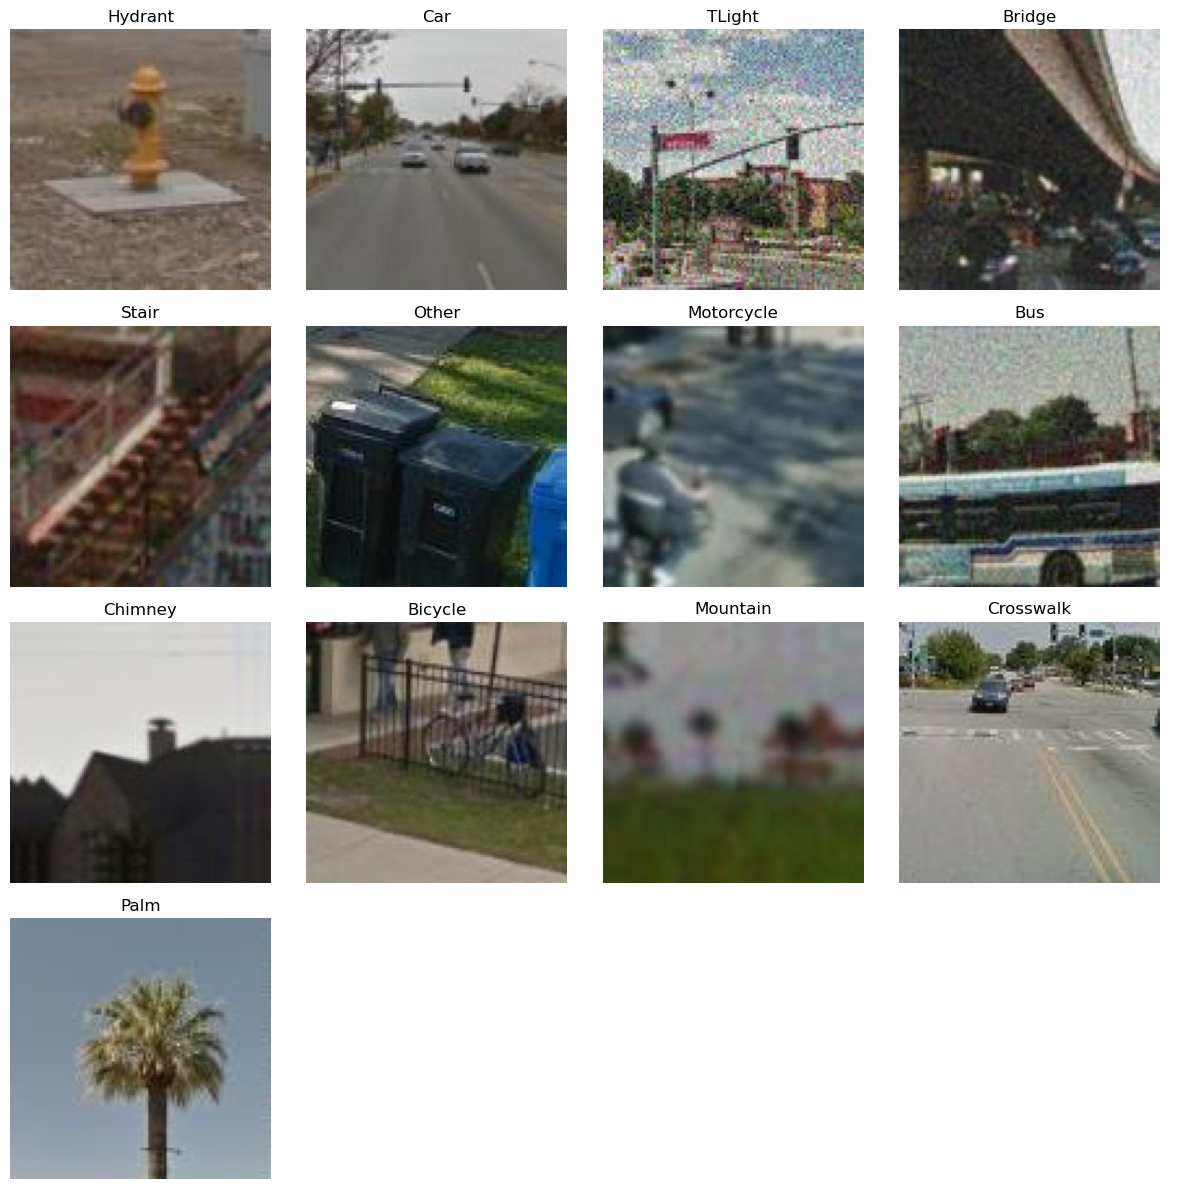

In [20]:
import shutil
import tempfile
from PIL import Image
import matplotlib.pyplot as plt
temp_dir = tempfile.mkdtemp()

try:
    # Create subdirectories for each folder in the temporary directory
    for folder, data in folder_image_data.items():
        folder_path = os.path.join(temp_dir, folder)
        os.makedirs(folder_path, exist_ok=True)

        for i, img_dict in enumerate(data['images']):
            img = img_dict['image']
            # Ensure the image is in the correct format
            img_rgb = img.convert('RGB')

            # Create a file path for saving the image
            img_path = os.path.join(folder_path, f'image_{i}.jpg')

            # Save the image to the temporary directory
            img_rgb.save(img_path, format='JPEG')

    # List the structure of the temporary directory with image sizes

    for root, dirs, files in os.walk(temp_dir):
        level = root.replace(temp_dir, '').count(os.sep)
        indent = ' ' * 4 * level

        subindent = ' ' * 4 * (level + 1)
        for f in files:
            img_path = os.path.join(root, f)
            with Image.open(img_path) as img:
                width, height = img.size


    # Display images from the temporary directory
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    count = 0
    axes = axes.flatten()
    for folder in os.listdir(temp_dir):
        if count >= 16:
            break
        folder_path = os.path.join(temp_dir, folder)
        if os.path.isdir(folder_path):
            img_files = os.listdir(folder_path)
            if img_files:
                img_path = os.path.join(folder_path, img_files[0])
                img = Image.open(img_path)
                axes[count].imshow(img)
                axes[count].set_title(folder)
                axes[count].axis('off')
                count += 1

    for i in range(count, 16):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

except:
  print("Error")
    # Clean up the temporary directory
 #   shutil.rmtree(temp_dir)

### 3.3 Datensatz erzeugen mithilfe Keras Bibliotheken

In [28]:
import shutil
import tempfile
import tensorflow as tf
import numpy as np

In [ ]:
try:
    # Load datasets using TensorFlow
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        temp_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=64,
        image_size=(120, 120),
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset='training',
        interpolation="bilinear",
        follow_links=False,
        crop_to_aspect_ratio=False,
        pad_to_aspect_ratio=False,
        data_format='channels_last',
        verbose=True
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        temp_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=64,
        image_size=(120, 120),
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset='validation',
        interpolation="bilinear",
        follow_links=False,
        crop_to_aspect_ratio=False,
        pad_to_aspect_ratio=False,
        data_format='channels_last',
        verbose=True
    )

    # Log the number of batches in each dataset
    print(f"training dataset contains {len(train_dataset)} Batches")
    print(f"testing dataset contains {len(validation_dataset)} Batches")

    # Iterate over the training dataset to print shapes
    for element in train_dataset:
        print(f"shape X_train: {element[0].shape}")
        print(f"shape Y_train: {element[1].shape}")
        break

    # Optionally, you can now use train_dataset and validation_dataset for training your model
    for images, labels in train_dataset.take(1):
        print(images.shape, labels.shape)

finally:
    # Clean up the temporary directory
    #shutil.rmtree(temp_dir)
    print("Yey")

In [ ]:
def show_class_images():
  # Collect one image from each category in the validation dataset
  category_images = {}
  class_names = validation_dataset.class_names
  for images, labels in validation_dataset:
          for img, label in zip(images, labels):
              category = class_names[np.argmax(label)]
              if category not in category_images:
                  category_images[category] = img.numpy()
              if len(category_images) == len(class_names):
                  break
          if len(category_images) == len(class_names):
              break

  num_categories = len(category_images)
  fig, axes = plt.subplots(1, num_categories, figsize=(15, 5))
  for ax, (category, img) in zip(axes, category_images.items()):
          ax.imshow(img.astype("uint8"))
          ax.set_title(category)
          ax.axis("off")

  plt.tight_layout()
  plt.show()

show_class_images()

In [ ]:
# Collect one image from each category in the training dataset
category_images = {}
class_names = train_dataset.class_names
for images, labels in train_dataset:
        for img, label in zip(images, labels):
            category = class_names[np.argmax(label)]
            if category not in category_images:
                category_images[category] = img.numpy()
            if len(category_images) == len(class_names):
                break
        if len(category_images) == len(class_names):
            break


num_categories = len(category_images)
fig, axes = plt.subplots(1, num_categories, figsize=(15, 5))
for ax, (category, img) in zip(axes, category_images.items()):
        ax.imshow(img.astype("uint8"))
        ax.set_title(category)
        ax.axis("off")

plt.tight_layout()
plt.show()

## 4. Entwicklung einer neuronalen Netzarchitektur

In [26]:
import tensorflow.keras as keras
train, validation = keras.utils.image_dataset_from_directory(
    os.getcwd(),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(120, 120),
    shuffle=True,
    seed=42,
    validation_split=.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format='channels_last',
    verbose=True,
)

Found 32265 files belonging to 13 classes.
Using 25812 files for training.
Using 6453 files for validation.


### 4.1 Überprüfung der GPU Unterstützung

In [27]:
import sys
import tensorflow.keras
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.6.1-arm64-arm-64bit
Tensor Flow Version: 2.17.0
Keras Version: 3.5.0

Python 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:51:49) [Clang 16.0.6 ]
GPU is available


### 4.2 Überwachung der Trainingsprozesse

In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint, ProgbarLogger, CSVLogger

tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    update_freq='epoch',
    write_graph=True)

checkpoint_callback = ModelCheckpoint(
    filepath=model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose =1)

progressbar_callback = ProgbarLogger()

csv_callback = CSVLogger(log_dir + 'logs.csv')

callbacks= [tensorboard_callback,
            checkpoint_callback,
            progressbar_callback,
            csv_callback]

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

# Define hyperparameters
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.RealInterval(0.001, 0.1))
HP_LOSS = hp.HParam('loss', hp.Discrete(['categorical_crossentropy']))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_EPOCHS = hp.HParam('epochs', hp.IntInterval(1, 10))

# Set the hyperparameters for this run
hparams = {
    HP_LEARNING_RATE: 0.001,
    HP_LOSS: 'categorical_crossentropy',
    HP_OPTIMIZER: 'adam',
    HP_EPOCHS: 5,
}

# Log hyperparameters before training starts
with tf.summary.create_file_writer(log_dir).as_default():
    hp.hparams(hparams)

### 4.2 Erstellung verschiedener neuronaler Netzarchitekturen

#### 4.2.1 ResNet

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution3D, Dense, Flatten, Dropout, GlobalAvgPool3D
resnet50v2 = keras.applications.ResNet50V2(
    include_top=False, # this removes the last layer of the original ResNet50V2 which enables a different output shape 
    weights='imagenet',
    input_shape=(120, 120, 3),
    name='resnet50v2')

model = Sequential()
model.add(resnet50v2)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(13, activation='softmax'))

model.summary()

#### 4.2.2 A basic Keras model

In [ ]:
from keras import layers
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### 4.3 Trainingsprozess

In [ ]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer=hparams[HP_OPTIMIZER],
              loss=hparams[HP_LOSS],
              metrics=["accuracy"])
model.fit(train, epochs=hparams[HP_EPOCHS], validation_data=validation, callbacks=callbacks)